# Análise gráfica, localização e refinamento de raízes

Neste capítulo, nosso objetivo é utilizar recursos de plotagem de gráficos no plano Cartesiano para analisar o comportamento de funções não lineares a fim de buscar intervalos iniciais para busca de raízes aproximadas de equações delas provenientes.

Faremos um estudo de caso baseado no modelo de salto de paraquedistas. Nosso alvo é obter o único valor do coeficiente de arrasto que valide a física do salto para parâmetros iniciais fixados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# parâmetros 
t = 12.0
v = 42.0
m = 70.0
g = 9.81

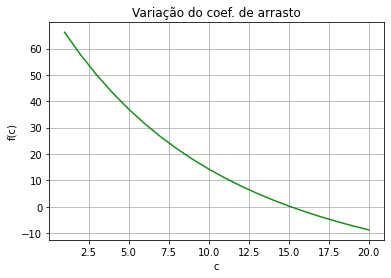

In [12]:
# localização
a,b = 1,20
c = np.linspace(a,b,20)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-',alpha=0.9);
plt.xlabel('c')
plt.ylabel('f(c)')
plt.title('Variação do coef. de arrasto')
plt.grid()

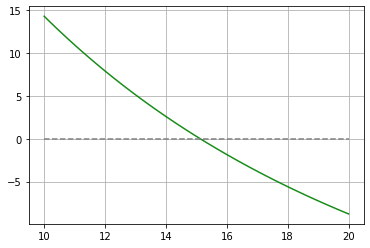

In [13]:
# refinamento
a,b = 10,20
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-',alpha=0.9);
plt.plot(c,0*c,'--',color='gray')
plt.grid();

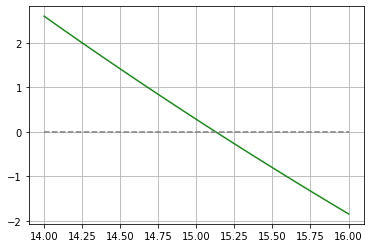

In [14]:
# refinamento
a,b = 14,16
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-',alpha=0.9);
plt.plot(c,0*c,'--',color='gray')
plt.grid();

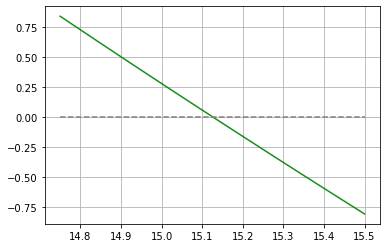

In [15]:
# refinamento
a,b = 14.75,15.5
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-',alpha=0.9);
plt.plot(c,0*c,'--',color='gray')
plt.grid();

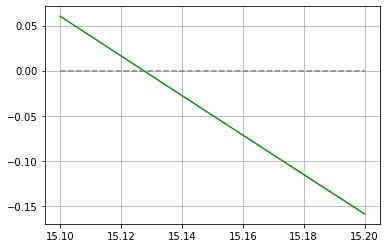

In [21]:
# refinamento
a,b = 15.1,15.2
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-',alpha=0.9);
plt.plot(c,0*c,'--',color='gray');
plt.grid()

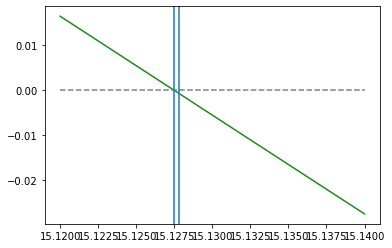

In [22]:
# refinamento
a,b = 15.12,15.14
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-',alpha=0.9);
plt.plot(c,0*c,'--',color='gray')
plt.axvline(x=15.1278)
plt.axvline(x=15.1275)

## O processo iterativo

Grande parte das tarefas realizadas por algoritmos utilizados em métodos numéricos baseiam-se em um processo de repetição chamado de _processo iterativo_, o qual gera a ideia de _aproximações sucessivas_. A estrutura de controle mais fundamental de que precisamos saber um pouco para o trabalho com computação numérica é o laço `for`. 

A seguir, vamos ver como usá-lo para calcular somatórias e produtórios finitos. Por exemplo, vamos computar: 

$s = \sum_{i=1}^n i = i + i + \ldots + i, para $n < \infty$.

Podemos fazer isto da seguinte maneira:

In [23]:
n = 10

s = 0.0
for i in range(n):
    s += i

Detalhando... Considere o par $(i,s_i)$. Há soma abaixo?

In [24]:
s = 0.
for i in range(n):
    print(i+1,s)

1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0


In [25]:
# Aqui há um incremento constante de 1
s = 0.
for i in range(n):
    s = s + 1
    print(i+1,s)

1 1.0
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
7 7.0
8 8.0
9 9.0
10 10.0


O exemplo anterior também poderia ser reproduzido como:

In [26]:
s = 0.
for i in range(n):
    s += 1 # produz o mesmo que s <- s + 1
    print(i+1,s)

1 1.0
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
7 7.0
8 8.0
9 9.0
10 10.0


No próximo exemplo, o incremento não é mais constante:

In [27]:
s = 0.
for i in range(n):
    s += i
    print(i+1,s)

1 0.0
2 1.0
3 3.0
4 6.0
5 10.0
6 15.0
7 21.0
8 28.0
9 36.0
10 45.0


## Determinação de raízes por força bruta

No computador, sabemos que uma função matemática $f(x)$ pode ser representada de duas formas principais:

- através de uma função programada (em Python, por exemplo) que retorna o valor da função para um dado argumento 
- uma coleção de pontos $(x,f(x))$ na forma de uma tabela.

A segunda forma é bem mais útil para análise gráfica. Esta forma é também adequada para resolver problemas de determinação de raízes e de otimização com simplicidade. No primeiro caso, basta pesquisar todos os pontos e procurar onde a função cruza o eixo $x$, como fizemos anteriormente. No segundo caso, buscamos um ponto de mínimo ou máximo local, ou global.

Abordagens que seguem esse caminho podem chegar a examinar uma grande quantidade de pontos. Por essa razão, são chamados de métodos de _força bruta_, isto é, não seguem uma técnica elaborada.

### Algoritmo numérico

Em geral, queremos resolver o problema $f(x) = 0$ especialmente quando $f$ é não-linear. Para isso, desejamos encontrar os $x$ onde $f$ cruza o eixo. Um algoritmo em força bruta deverá percorrer todos os pontos sobre a curva e verificar se um ponto está abaixo do eixo e seu sucessor imediato está acima, ou vice-versa. Se isto ocorrer, então deve haver uma raiz neste intervalo. 

**Algoritmo.** Dado um conjunto de $n+1$ pontos $(x_i,y_i)$, $y_i = f(x_i), \, i = 0,\ldots,n$, onde $x_0 < \ldots < x_n$. Verificamos se $y_i < 0$ e se $y_{i+1} > 0$. Uma expressão compacta para esta checagem é o teste $y_i \, y_{i+1} < 0$. Se o produto for negativo, então a raiz de $f$ está no intervalo $[x_i,x_{i+1}]$. Assumindo uma variação linear entre os pontos, temos a aproximação

$$f(x) \approx \dfrac{ y_{i+1} - y_i }{ x_{i+1} - x_i }(x - x_i) + y_i.$$

Logo, $f(x) = 0$ implica que a raiz é 

$$x = x_i - \dfrac{ x_{i+1} - x_i }{ y_{i+1} - y_i }y_i.$$

**Exemplo.** Encontre a raiz da função $f(x) = \exp(-x^2)\cos(3x)$ usando o algoritmo de força bruta.

Vamos plotar esta função apenas para visualizar seu comportamento.

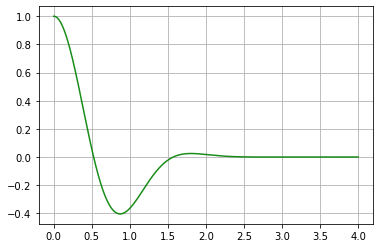

In [35]:
from numpy import exp, cos

f = lambda x: exp(-x**2)*cos(3*x)
x = np.linspace(0,4,1000)
plt.plot(x,f(x),'g',alpha=0.9); 
plt.grid()

Nesta plotagem, vemos claramente que a função possui duas raizes: uma próxima de $x = 0.5$ e outra em $x = \pi/6$. 

Implementemos o algoritmo.

In [36]:
def forca_bruta(f,a,b,n):
    from numpy import linspace
    x = linspace(a,b,n)
    y = f(x)
    raizes = []
    for i in range(n-1):
        if y[i]*y[i+1] < 0:
            raiz = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
            raizes.append(raiz)
    if len(raizes) == 0:               
        print('Nenhuma raiz foi encontrada')
    return raizes

Agora aplicamos o algoritmo na mesma função.

In [37]:
a,b,n = 0,4,1000
raizes = forca_bruta(f,a,b,n)
print(raizes)

[0.5236017411236913, 1.5708070694852787, 2.6180048381439596, 3.665219264613299]


Temos, na verdade, 4 raízes! Plotemos o gráfico ampliado no intervalo [2.5,3.8].

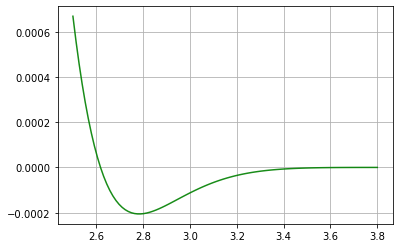

In [38]:
x2 = np.linspace(2.5,3.8,100)
plt.plot(x2,f(x2),'g',alpha=0.9); plt.grid()

Conseguimos enxergar mais uma raiz. Agora, plotemos um pouco mais ampliado entre [3.6,3.7].

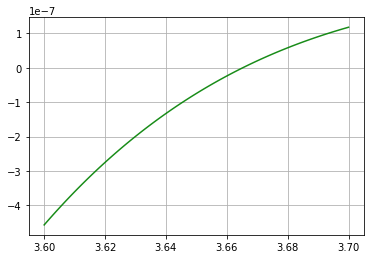

In [39]:
x3 = np.linspace(3.6,3.7,100)
plt.plot(x3,f(x3),'g',alpha=0.9); plt.grid()

Dessa forma, podemos identificar que, de fato existe uma quarta raiz.

Este exemplo mostrou uma aplicação do método de força bruta para determinação de raízes. Para finalizar, podemos embelezar o gráfico.

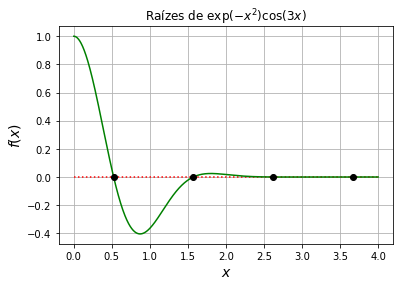

In [41]:
r = np.array(raizes) # vetoriza a lista
plt.plot(x,0*f(x),'r:',x,f(x),'-g',r,np.zeros(4),'ok',)
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$f(x)$',fontsize=14)        
plt.grid()
plt.title('Raízes de $\exp(-x^2)\cos(3x)$');